In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

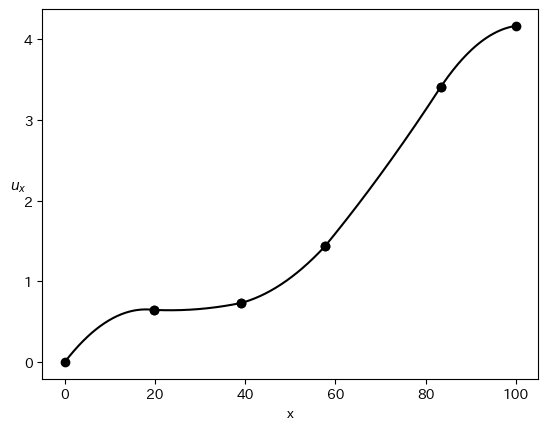

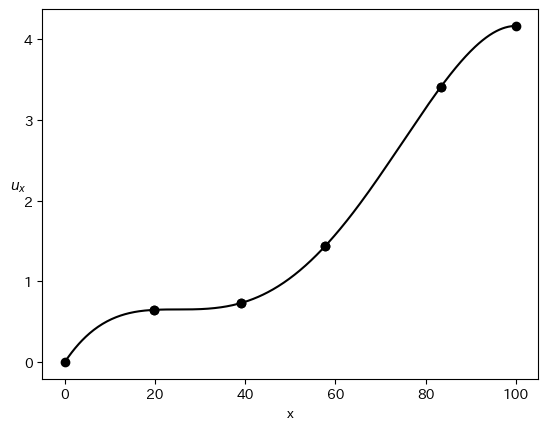

In [2]:
for coordinates in ["cart", "curv"]:
    fig, ax = plt.subplots()
    uxplt = np.zeros((0, 2))
    for i in range(5):
        data = np.loadtxt("output/dist_displacement/" +
                          coordinates + "/" + str(i) + ".csv", delimiter=",")
        ax.scatter(data[0, 0], data[0, 1], c="black")
        ax.scatter(data[-1, 0], data[-1, 1], c="black")
        uxplt = np.concatenate([uxplt, data], 0)
    ax.plot(uxplt[:, 0], uxplt[:, 1], c="black")
    ax.set_xlabel("x")
    ax.set_ylabel("$u_x$", rotation=0)


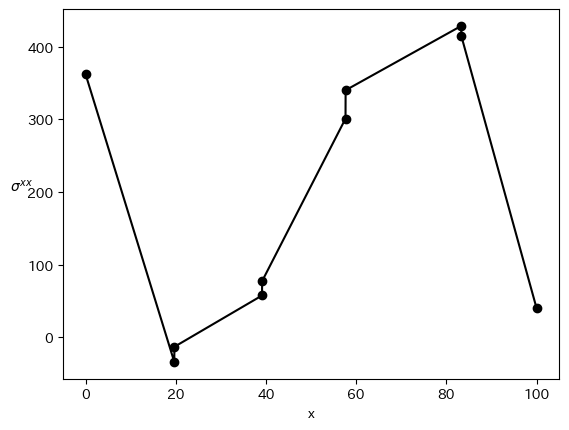

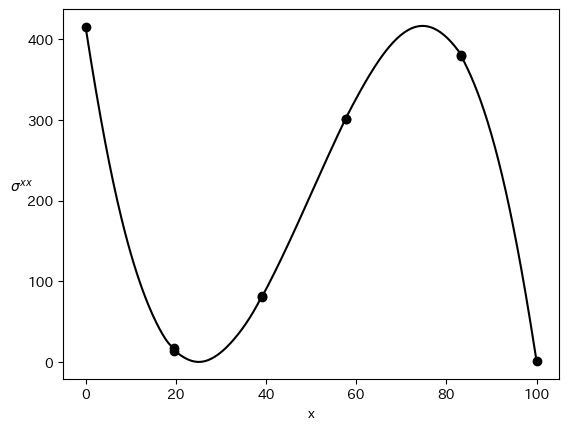

In [3]:
for coordinates in ["cart", "curv"]:
    fig, ax = plt.subplots()
    uxplt = np.zeros((0, 2))
    for i in range(5):
        data = np.loadtxt("output/dist_stress/" + coordinates +
                          "/" + str(i) + ".csv", delimiter=",")
        ax.scatter(data[0, 0], data[0, 1], c="black")
        ax.scatter(data[-1, 0], data[-1, 1], c="black")
        uxplt = np.concatenate([uxplt, data], 0)
    ax.plot(uxplt[:, 0], uxplt[:, 1], c="black")
    ax.set_xlabel("x")
    ax.set_ylabel("$\sigma^{xx}$", rotation=0)


Text(0, 0.5, '$u - u^{anl}$')

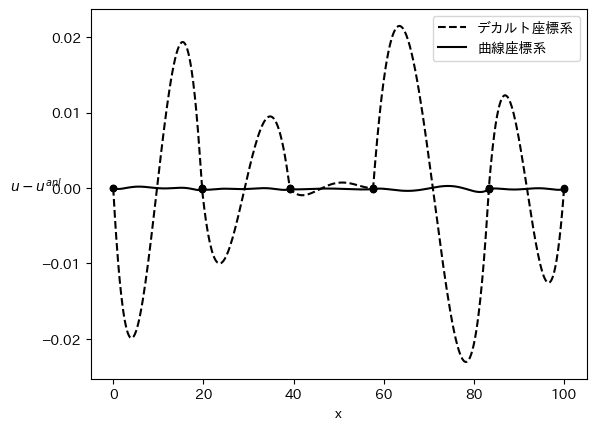

In [4]:
def uanl(x):
    return -3.3333333333333335e-7*(x*(-250000 + 11250*x - 200*pow(x, 2) + pow(x, 3)))


fig, ax = plt.subplots()
uxplt = np.zeros((0, 2))
for i in range(5):
    data = np.loadtxt("output/dist_displacement/cart/" +
                      str(i) + ".csv", delimiter=",")
    ax.scatter(data[0, 0], data[0, 1]-uanl(data[0, 0]), c="black", s=20)
    ax.scatter(data[-1, 0], data[-1, 1]-uanl(data[-1, 0]), c="black", s=20)
    uxplt = np.concatenate([uxplt, data], 0)
node = np.loadtxt("output/displacement_cart.csv", skiprows=1, delimiter=",")
uxplt = np.concatenate([uxplt, node], 0)
uxplt = np.array(pd.DataFrame(uxplt).sort_values(0))
ax.plot(uxplt[:, 0], uxplt[:, 1] - np.array([uanl(x)
        for x in uxplt[:, 0]]), c="black", linestyle="dashed", label="デカルト座標系")
uxplt = np.zeros((0, 2))
for i in range(5):
    data = np.loadtxt("output/dist_displacement/curv/" +
                      str(i) + ".csv", delimiter=",")
    ax.scatter(data[0, 0], data[0, 1]-uanl(data[0, 0]), c="black", s=20)
    ax.scatter(data[-1, 0], data[-1, 1]-uanl(data[-1, 0]), c="black", s=20)
    uxplt = np.concatenate([uxplt, data], 0)
node = np.loadtxt("output/displacement_curv.csv", skiprows=1, delimiter=",")
uxplt = np.concatenate([uxplt, node], 0)
uxplt = np.array(pd.DataFrame(uxplt).sort_values(0))
ax.plot(uxplt[:, 0], uxplt[:, 1] - np.array([uanl(x)
        for x in uxplt[:, 0]]), c="black", linestyle="solid", label="曲線座標系")
ax.legend(loc="best")
ax.set_xlabel("x")
ax.set_ylabel("$u - u^{anl}$", rotation=0)


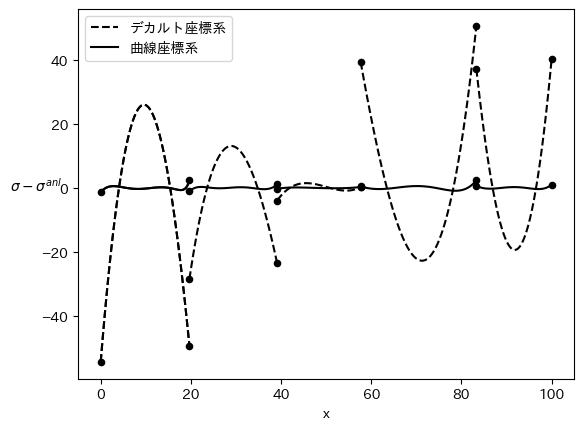

In [5]:
def siganl(x):
    return -(1/150) * (-100 + x) * (-25 + x) ** 2


fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("$\sigma - \sigma^{anl}$", rotation=0)

xplt = np.zeros(0)
sigxplt = np.zeros(0)
for ie in range(5):
    filename = "output/dist_stress/cart/" + str(ie) + ".csv"
    data = np.loadtxt(filename, delimiter=',')
    ax.scatter(data[0, 0], data[0, 1]-siganl(data[0, 0]), c="black", s=20)
    ax.scatter(data[-1, 0], data[-1, 1]-siganl(data[-1, 0]), c="black", s=20)
    if ie == 0:
        ax.plot(data[:, 0], data[:, 1]-np.array([siganl(x)
                for x in data[:, 0]]), c="black", linestyle="dashed", label="デカルト座標系")
    ax.plot(data[:, 0], data[:, 1]-np.array([siganl(x)
            for x in data[:, 0]]), linestyle="dashed", c="black")
    x = data[:, 0]
    sigx = data[:, 1]
    xplt = np.concatenate([xplt, x], 0)
    sigxplt = np.concatenate([sigxplt, sigx], 0)

xplt = np.zeros(0)
sigpplt = np.zeros(0)
for ie in range(5):
    filename = "output/dist_stress/curv/" + str(ie) + ".csv"
    data = np.loadtxt(filename, delimiter=',')
    ax.scatter(data[0, 0], data[0, 1]-siganl(data[0, 0]), c="black", s=20)
    ax.scatter(data[-1, 0], data[-1, 1]-siganl(data[-1, 0]), c="black", s=20)
    if ie == 0:
        ax.plot(data[:, 0], data[:, 1]-np.array([siganl(x)
                for x in data[:, 0]]), c="black", linestyle="solid", label="曲線座標系")
    ax.plot(data[:, 0], data[:, 1]-np.array([siganl(x)
            for x in data[:, 0]]), linestyle="solid", c="black")
    x = data[:, 0]
    sigp = data[:, 1]
    xplt = np.concatenate([xplt, x], 0)
    sigpplt = np.concatenate([sigpplt, sigp], 0)
plt.legend(loc="best")
